In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('peridepr.csv')

In [3]:
df.head()

,Age,Sleepinghours,Workhours,Weeks_of_Pregnancy,Healthproblems,Desiredpregnancy,Maritalstatus,Family_history_of_mentalillness,Weight,Depression
0,27,9,6,25,0,1,1,0,58,0
1,20,6,9,18,1,0,0,0,45,1
2,24,9,4,20,1,1,1,0,55,0
3,28,9,4,18,0,1,1,0,54,0
4,20,7,8,25,0,0,0,1,46,1


In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10496 entries, 0 to 10495
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              10496 non-null  int64
 1   Sleepinghours                    10496 non-null  int64
 2   Workhours                        10496 non-null  int64
 3   Weeks_of_Pregnancy               10496 non-null  int64
 4   Healthproblems                   10496 non-null  int64
 5   Desiredpregnancy                 10496 non-null  int64
 6   Maritalstatus                    10496 non-null  int64
 7   Family_history_of_mentalillness  10496 non-null  int64
 8   Weight                           10496 non-null  int64
 9   Depression                       10496 non-null  int64
dtypes: int64(10)
memory usage: 820.1 KB
None


In [5]:
NA =pd.concat([df.isnull().sum()], axis=1, keys=["df"])
NA[NA.sum(axis=1) > 0]

,df


In [6]:
label = df.pop("Depression")

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,label,test_size=0.20)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
y_pred = rf.predict(x_test)

In [10]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.873015354103327

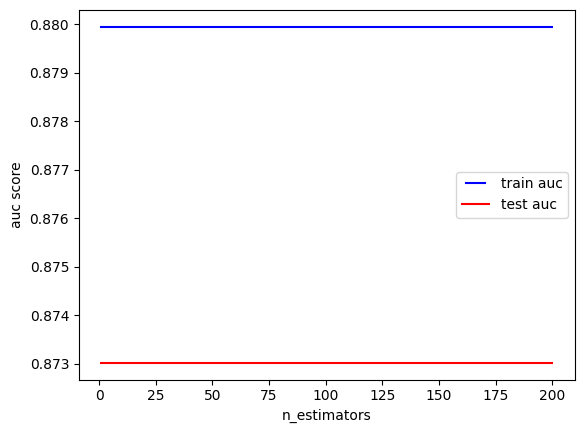

In [11]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_result = []
test_result = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator , n_jobs=-1)
    rf.fit(x_train,y_train)

    train_pred = rf.predict(x_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_result.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_result.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_result, "b",label="train auc")
line2, = plt.plot(n_estimators,test_result, "r",label="test auc")
plt.legend(handler_map={line1 : HandlerLine2D(numpoints=2)})
plt.ylabel("auc score")
plt.xlabel("n_estimators")
plt.show()

In [12]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.873015354103327

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.873015354103327

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [16]:
score

0.8723809523809524

In [17]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf,pickle_out)
pickle_out.close()